<a href="https://colab.research.google.com/github/kilos11/AJAY_R_Datasets_For_Work/blob/main/Poetry_generation_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.15.0


## Step 1: Create a corpus

In [2]:
##download data from this url
!wget --no-check-certificate \
    https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
    -O /tmp/sonnet.txt

--2023-12-18 10:51:03--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0.002s  

2023-12-18 10:51:04 (17.3 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [3]:
##printing the text
shakespeare_text = open('/tmp/sonnet.txt').read()
print(len(shakespeare_text))

28893


In [4]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")

## Set up the tokenizer

In [5]:
##set up tokenizer
tokenizer = Tokenizer()

In [6]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [7]:
##create sequences of
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


In [8]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [9]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [10]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

##define the learning rate - step size for optimizer
adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
142/142 [==============================] - 11s 47ms/step - loss: 6.7855 - accuracy: 0.0161
Epoch 2/200
142/142 [==============================] - 2s 18ms/step - loss: 6.3282 - accuracy: 0.0190
Epoch 3/200
142/142 [==============================] - 1s 9ms/step - loss: 6.2072 - accuracy: 0.0234
Epoch 4/200
142/142 [==============================] - 2s 11ms/step - loss: 6.0706 - accuracy: 0.0294
Epoch 5/200
142/142 [==============================] - 2s 11ms/step - loss: 5.8933 - accuracy: 0.0404
Epoch 6/200
142/142 [==============================] - 2s 14ms/step - loss: 5.6870 - accuracy: 0.0479
Epoch 7/200
142/142 [==============================] - 1s 8ms/step - loss: 5.4560 - accuracy: 0.0513
Epoch 8/200
142/142 [==============================] - 1s 8ms/step - loss: 5.1911 - accuracy: 0.0650
Epoch 9/200
142/142 [==============================] - 1s 9ms/step - loss: 4.9217 - accuracy: 0.0780
Epoch 10/200
142/142 [==============================] - 1s 8ms/step - loss: 4.6420 - 

## Visualise the metrics

In [11]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

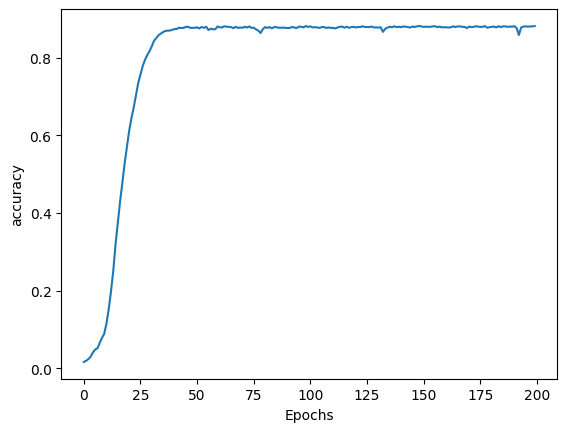

In [12]:
plot_metric(history, 'accuracy')

## Generate new text

In [13]:
seed_text = "It was a cold night."
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

AttributeError: ignored